# Tandon_Torch Final Project

####  Team Member
* Chuan Long
* Qingyi Ma
* Suyang Jiang

### 0. Some useful Links

* [final-project proposal](https://docs.google.com/a/nyu.edu/document/d/1-7z-mpCGSWKxE0MdWpkioPb0_NaM8gSmMzCj4mR3PpE/edit?usp=sharing)
* [kaggle-pipeline](https://www.zhihu.com/question/23987009)

### 1. Data Exploration
* 查看目标变量的分布。当分布不平衡时，根据评分标准和具体模型的使用不同，可能会严重影响性能。
* 对 Numerical Variable，可以用 Box Plot 来直观地查看它的分布。
* 对于坐标类数据，可以用 Scatter Plot 来查看它们的分布趋势和是否有离群点的存在。
* 对于分类问题，将数据根据 Label 的不同着不同的颜色绘制出来，这对 Feature 的构造很有帮助。绘制变量之间两两的分布和相关度图表。


In [34]:
# Import some useful modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Chuan Long

In [13]:
file_path = '/Users/chuanlong/Desktop/Tandon_Torch/train.json'
df = pd.read_json(file_path);
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [28]:
# Filter the building list that missing building id
outlier_filter_buildingid = (df.building_id != '0')
df = df[outlier_filter_buildingid]
df.building_id.value_counts
df.building_id.describe()

count                                41066
unique                                7584
top       96274288c84ddd7d5c5d8e425ee75027
freq                                   275
Name: building_id, dtype: object

In [27]:
df.created.describe()

count                   41066
unique                  40646
top       2016-06-21 04:44:43
freq                        3
Name: created, dtype: object

In [83]:
df.price.describe()
# Filter the abnormal price
# Adjust the range based on the hist figure
outlier_filer_price = (500 < df.price) & (df.price < 8000)
df = df[outlier_filer_price]
df.price.describe()

count    35600.000000
mean      3601.075084
std       1217.385255
min       2011.000000
25%       2695.000000
50%       3295.000000
75%       4200.000000
max       7999.000000
Name: price, dtype: float64

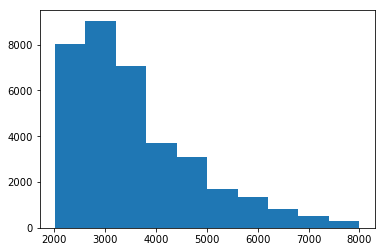

In [84]:
plt.hist(df.price)
plt.show()

In [88]:
# Filter the missing listing id
df = df[df.listing_id.isnull() == False]

In [90]:
df.longitude.describe()

count    35600.000000
mean       -73.963377
std          1.066921
min       -118.271000
25%        -73.994000
50%        -73.980900
75%        -73.961700
max          0.000000
Name: longitude, dtype: float64

In [91]:
df.latitude.describe()

count    35600.000000
mean        40.740646
std          0.574282
min          0.000000
25%         40.728300
50%         40.748600
75%         40.769700
max         42.872500
Name: latitude, dtype: float64

In [109]:
outlier_filter_longitude = (df.longitude > -74.2) & (df.longitude < -73.6)
df = df[outlier_filter_longitude]
outlier_filter_latitude = (df.latitude > 40.0) & (df.latitude < 41.0) 
df = df[outlier_filter_latitude]

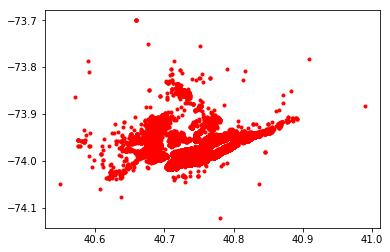

In [110]:
plt.plot(df.latitude, df.longitude, 'r.')
plt.show()

In [108]:
df.created.value_counts

<bound method IndexOpsMixin.value_counts of 10        2016-06-24 07:54:24
10000     2016-06-12 12:19:27
100004    2016-04-17 03:26:41
100007    2016-04-18 02:22:02
100014    2016-04-19 04:24:47
100016    2016-04-27 03:19:56
100020    2016-04-13 06:01:42
100044    2016-04-19 05:37:25
100051    2016-04-18 02:36:00
100052    2016-04-22 05:57:16
100055    2016-04-20 04:00:32
100058    2016-04-09 03:49:42
100062    2016-04-12 02:39:45
100063    2016-04-07 02:11:45
100065    2016-04-13 05:17:43
100066    2016-04-17 02:26:52
10007     2016-06-07 04:39:56
100071    2016-04-27 06:43:40
100075    2016-04-25 02:29:50
100076    2016-04-22 05:39:10
100081    2016-04-26 02:59:37
100083    2016-04-21 02:17:28
100084    2016-04-04 04:10:01
100085    2016-04-22 04:58:35
100087    2016-04-20 02:43:19
10009     2016-06-17 03:30:24
100099    2016-04-06 06:27:51
10010     2016-06-29 04:08:35
100100    2016-04-18 04:46:30
100115    2016-04-25 21:03:08
                 ...         
99886     2016-04-08 02:27

##### Qingyi Ma

##### Suyang Jiang

### 2. Data Preprocessing
* 有时数据会分散在几个不同的文件中，需要 Join 起来。
* 处理 Missing Data。处理 Outlier。
* 必要时转换某些 Categorical Variable 的表示方式。
* 有些 Float 变量可能是从未知的 Int 变量转换得到的，这个过程中发生精度损失会在数据中产生不必要的 Noise，即两个数值原本是相同的却在小数点后某一位开始有不同。这对 Model 可能会产生很负面的影响，需要设法去除或者减弱 Nois

### 3. Feature Engineering

#### 3.1 Feature Selection
* Feature 越少，训练越快。
* 有些 Feature 之间可能存在线性关系，影响 Model 的性能。
* 通过挑选出最重要的 Feature，可以将它们之间进行各种运算和操作的结果作为新的 Feature，可能带来意外的提高。

#### 3.2 Feature Encoding

假设有一个 Categorical Variable 一共有几万个取值可能，那么创建 Dummy Variables 的方法就不可行了。这时一个比较好的方法是根据 Feature Importance 或是这些取值本身在数据中的出现频率，为最重要（比如说前 95% 的 Importance）那些取值（有很大可能只有几个或是十几个）创建 Dummy Variables，而所有其他取值都归到一个“其他”类里面。

### 4. Model Selection & Model Training

####  Kaggle 上最常用的模型基本都是基于树的模型：

* Gradient Boosting
* Random Forest
* Extra Randomized Trees

### 5. Cross Validation
Cross Validation 是非常重要的一个环节。它让你知道你的 Model 有没有 Overfit，是不是真的能够 Generalize 到测试集上。

### 6. Ensemble Generation

### 7. Stacking 